# SeisComp3 stations inventory  


##  Fei Zhang


In [3]:
import sys
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

# from IPython.display import display

# %matplotlib inline

In [4]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    #in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    in_pdf =  pd.read_csv(csvfile,  sep='|', header='infer') # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [5]:
# OR read in from already sorted (zoned) csv file
#inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_S.csv'
#inputcsv ='/Softlab/travel_time_tomography/CSV_Data/engdahl/outfile_S.csv'

inputcsv='/g/data1a/ha3/fxz547/Githubz/passive-seismic/sc3/sc3inventory_20181030.txt'
inputpdf = csv2pdf(inputcsv)

In [6]:
inputpdf.shape

(21939, 8)

In [7]:
inputpdf.head()

,#Network,Station,Latitude,Longitude,Elevation,SiteName,StartTime,EndTime
0,GE,SBV,-13.45840,49.92120,65.0,"GEOFON Station Sambava, Madagascar",2009-11-19T00:00:00,NaN
1,GE,VOI,-21.90648,46.79327,1158.0,"GEOFON Station Vohitsoka, Madagascar",2009-11-26T00:00:00,NaN
2,GE,MALK,8.39682,80.54254,113.0,"GEOFON Station Mahakanadarawa, Sri Lanka",2010-04-10T00:00:00,NaN
3,GE,HALK,6.08850,80.68050,42.0,"GEOFON Station Hakmana, Sri Lanka",2010-04-23T00:00:00,2011-05-11T00:00:00
4,GE,HALK,6.08770,80.68060,120.0,"GEOFON Station Hakmana, Sri Lanka",2011-05-12T00:00:00,NaN


In [8]:
inputpdf.columns


Index(['#Network', 'Station', 'Latitude', 'Longitude', 'Elevation', 'SiteName',
       'StartTime', 'EndTime'],
      dtype='object')

In [9]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

In [10]:
pdf2.Station.nunique()  # number of unique values

19881

In [11]:
pdf2['#Network'].nunique()

311

In [12]:
pdf2.Latitude.nunique()

16730

In [13]:
pdf2.Longitude.nunique()

17919

In [14]:
pdf2.groupby(['#Network', 'Station']).count().shape

(21570, 6)

# Begin to Visualize the data

# 1. Python Pandas package plot function (with basemap) 

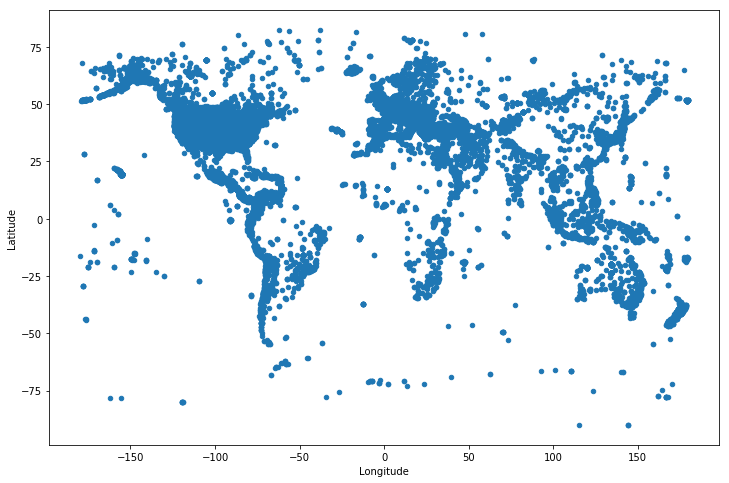

In [15]:
#plt.figure(); 
pdf2.plot.scatter(x= 'Longitude', y= 'Latitude',figsize=(12,8))

# 3. Geopandas and Maps

In [16]:
import geopandas as gpd

In [17]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [18]:
station_locations = [Point(xy) for xy in zip(pdf2.Longitude, pdf2.Latitude)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=station_locations)

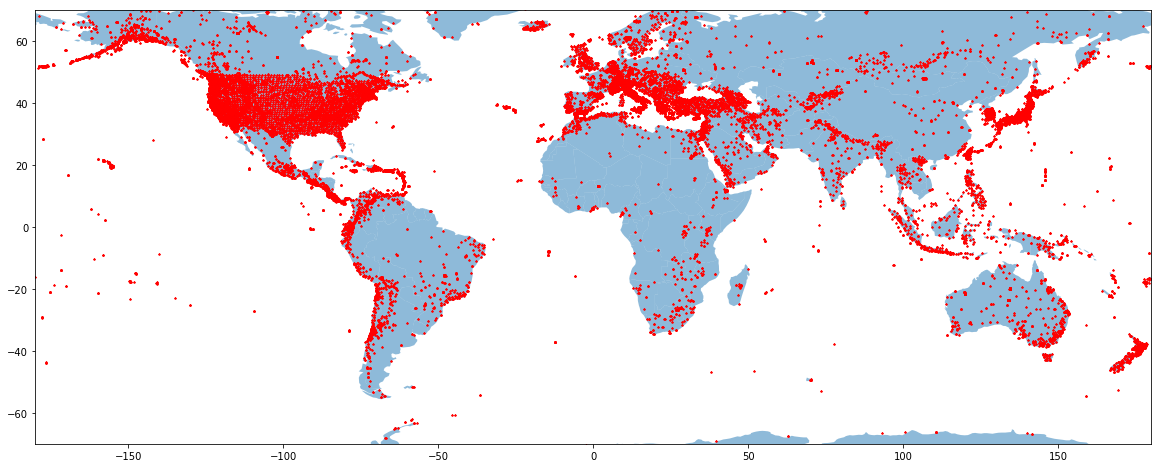

In [21]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# composing two layers in a map
f, ax = plt.subplots(1, figsize=(20, 12))

ax.set_xlim([-180,180])
ax.set_ylim([-70,70])

# Add layer of polygons on the axis
world.plot(ax=ax, alpha=0.5)

geopdf.plot(ax=ax, marker='*', color='red', markersize=3)

plt.savefig('ALL_stations.png')

